In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [19]:
df.shape

(7500, 11)

In [20]:
df.info

<bound method DataFrame.info of                     winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region   price                  type  body  acidity  
0     Espana              Toro  995.00              Toro Red   5.0      3.0  
1     Espana    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2     Espana  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3     Espana  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4     Espana  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  
...      ...               ...     ...                   ...   ...      ...  
7495  Espana             Rioja   19.98             Rioja Red   4.0      3.0  
7496  Espana          Priorato   16.76           Priorat Red   4.0      3.0  
7497  Espana      El Terrerazo   24.45                   Red   4.0      3.0  
7498  Espana  Ribera del Duero   64.50  Ribera Del Duero Red   5.0      3.0  
7499  Espana  Ribera del Duero   31.63  Ribera Del Duero Red   5.0      3.0  

[7500 rows x 11 columns]>

In [21]:
df.dtypes

,0
winery,object
wine,object
year,object
rating,float64
num_reviews,int64
country,object
region,object
price,float64
type,object
body,float64


In [22]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [23]:
df = df.drop('country', axis=1)

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['winery', 'wine', 'region', 'type']:
    df[col] = le.fit_transform(df[col])

In [25]:
df.isnull().sum()

,0
winery,0
wine,0
year,290
rating,0
num_reviews,0
region,0
price,0
type,0
body,1169
acidity,1169


In [26]:
mean_b=df.body.median()
mean_a=df.acidity.median()
df['year'] = df.year.fillna(df['year'].median())
df['body']=df.body.fillna(mean_b)
df['acidity']=df.acidity.fillna(mean_a)

In [27]:
df.isnull().sum()

,0
winery,0
wine,0
year,0
rating,0
num_reviews,0
region,0
price,0
type,0
body,0
acidity,0


In [31]:
df.duplicated().sum()

np.int64(5029)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
df.duplicated().sum()

np.int64(0)

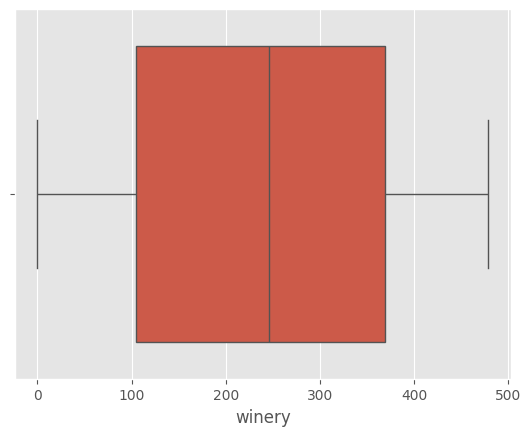

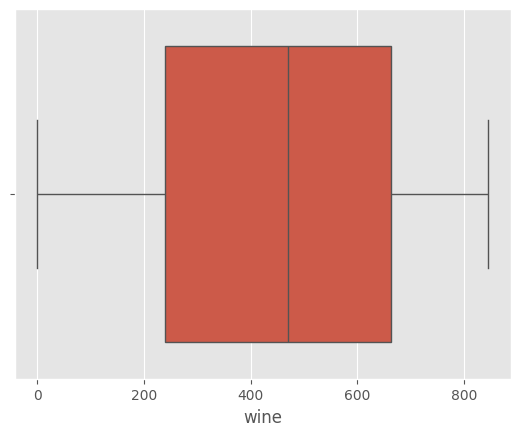

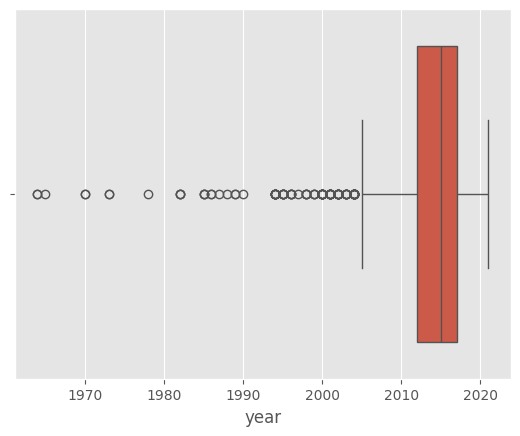

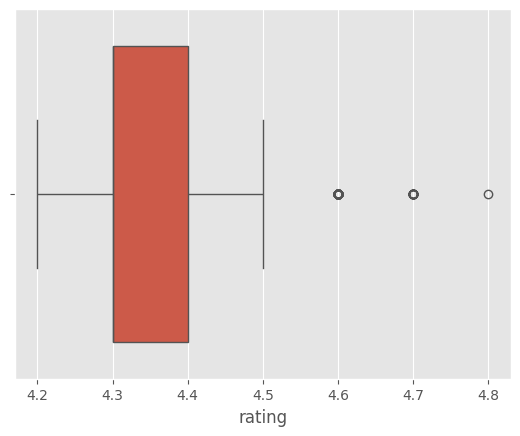

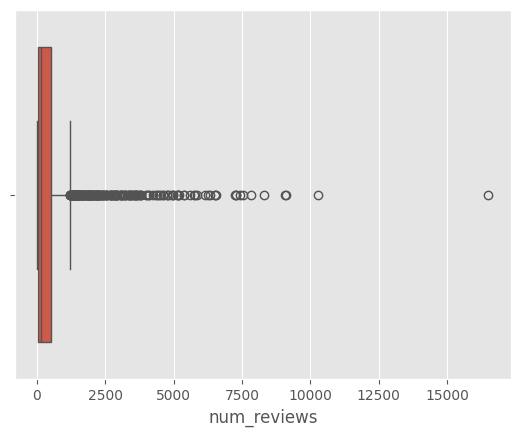

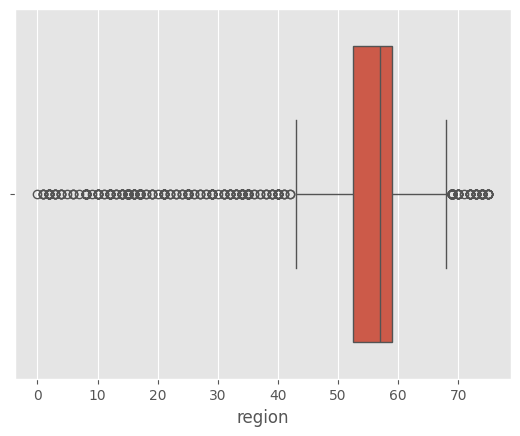

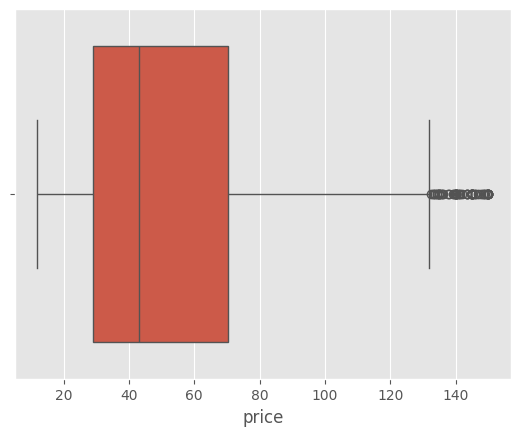

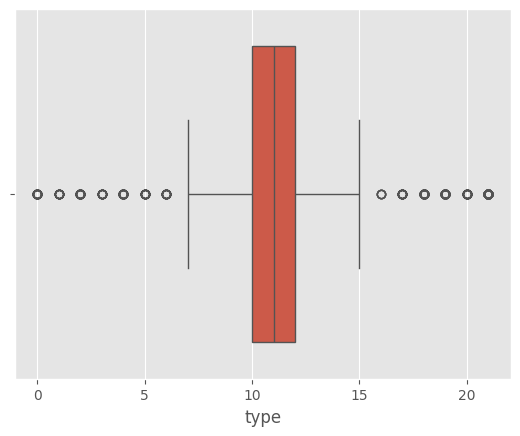

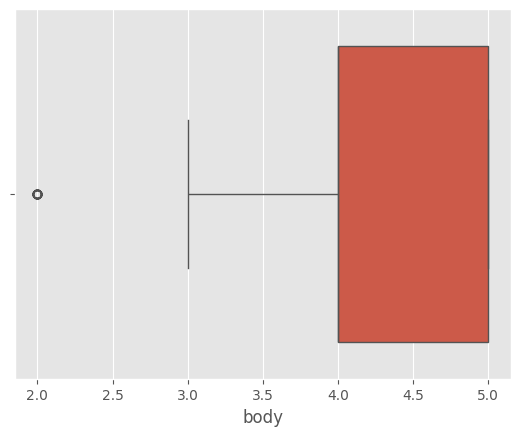

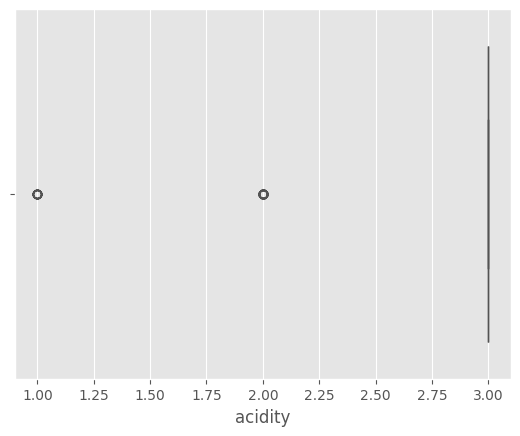

In [34]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
for i in df.select_dtypes(include=['int64','float64']).columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [35]:
df = df[(df["price"] < df["price"].quantile(0.95)) & (df["price"]>df["price"].quantile(0.05))]
df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
11,353,241,2016.0,4.8,454,57,105.15,11,5.0,3.0
58,447,786,2016.0,4.7,2177,57,107.57,11,5.0,3.0
65,353,206,2014.0,4.7,685,57,113.18,11,5.0,3.0
69,353,241,2015.0,4.7,543,57,75.10,11,5.0,3.0
76,461,413,2015.0,4.7,312,59,82.58,12,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2041,317,260,2019.0,4.2,400,69,27.89,19,5.0,3.0
2042,33,790,2016.0,4.2,398,74,48.96,18,4.0,2.0
2047,316,342,2011.0,4.2,389,57,64.50,11,5.0,3.0
2048,406,596,2016.0,4.2,388,57,31.63,11,5.0,3.0
